Arvind Testing code

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
df = pd.read_json('data/SemEval2026-Task_4-dev-v1/dev_track_a.jsonl', lines=True)

In [5]:
df.head()

,anchor_text,text_a,text_b,text_a_is_closer
0,The book follows an international organization...,The old grandmother Tina arrives in town to at...,The nano-plague that poisoned Earth's water su...,False
1,"Glenn Tyler (Elvis Presley), a childish 25-yea...","Bill Babbitt supported the death penalty, unti...",A white-collar suburban father Kyle (Fran Kran...,True
2,Signaller Charles Plumpick (Bates) is a kilt-w...,"Sid, Russ and Jerry are three wannabe criminal...",Brendan Byers III is a rich playboy who enlist...,False
3,Barbara is married to the distinguished profes...,Eddie Quinn's unruly wife Maureen drinks and s...,Jerome Littlefield is an orderly at a hospital...,False
4,A wealthy widower locks up his two grown-up ch...,Barbara is married to the distinguished profes...,Stefano (Lino Capolicchio) arrives in a villag...,False


# EDA - Exploratory Data Analysis

text_a_is_closer
True     101
False     99
Name: count, dtype: int64


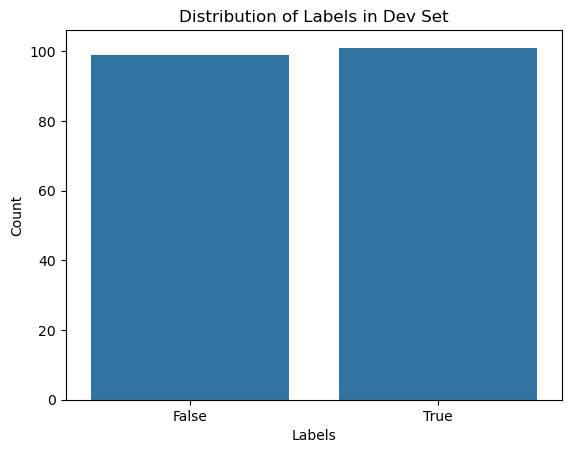

In [6]:
print(df['text_a_is_closer'].value_counts())
sns.countplot(x='text_a_is_closer', data=df)
plt.title('Distribution of Labels in Dev Set')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

It is almost equally distributed

In [7]:
df.isna().sum()

anchor_text         0
text_a              0
text_b              0
text_a_is_closer    0
dtype: int64

No null values

In [8]:
def preprocess_transformer(text):
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    text = text.replace("\u200b", "")  # zero-width spaces
    return text

In [9]:
from transformers import AutoTokenizer

def get_tokenizer(model_name="bert-base-uncased"):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    return tokenizer

/opt/miniconda3/envs/semeval/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Synthetic data

In [12]:
df_syn = pd.read_json('data/SemEval2026-Task_4-dev-v1/synthetic_data_for_classification.jsonl', lines=True)
df_syn.drop('model_name', axis=1, inplace=True)

In [13]:
df_syn.head()

,anchor_text,text_a,text_b,text_a_is_closer
0,"A mysterious individual, known only by their a...","In the coastal city of Tidal Cove, a reclusive...","In the secluded hamlet of Ravenshire, a myster...",False
1,A mysterious drifter arrives in the lawless fr...,"In a sprawling, rain-soaked city, a quiet mech...",A lone wanderer arrives in the turbulent minin...,False
2,"A team of paranormal investigators, led by sea...","In a bustling modern city, a group of amateur ...","A group of spectral researchers, led by experi...",False
3,A prolonged drought devastates a rural farming...,A severe heatwave grips the remote farming set...,"In a remote coastal town, a series of mysterio...",True
4,The film revolves around a Marine who is sever...,The film follows Gunnery Sergeant Ryder Thomps...,"In a dystopian future, Captain Rachel Kim, a r...",True


In [14]:
df_syn.isna().sum()

anchor_text         3
text_a              3
text_b              3
text_a_is_closer    0
dtype: int64

In [17]:
df_syn[df_syn.isnull().any(axis=1)]

,anchor_text,text_a,text_b,text_a_is_closer
264,None,None,None,True
1276,None,None,None,True
1584,None,None,None,True


In [18]:
df_syn.dropna(inplace=True)
df_syn.reset_index(drop=True, inplace=True)
df_syn.isna().sum()

anchor_text         0
text_a              0
text_b              0
text_a_is_closer    0
dtype: int64

In [20]:
df_syn.shape

(1897, 4)

In [ ]:
def preprocess(df):
    df = df[['anchor_text', 'text_a', 'text_b', 'text_a_is_closer']]
    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df